In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [7]:
boston=load_boston()

In [11]:
df=pd.DataFrame(boston.data)

In [14]:
df.columns=boston.feature_names
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [15]:
df['MEDV']=boston.target

In [16]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
df.shape

(506, 14)

In [21]:
x=df.iloc[:,:13]

In [27]:
y=df.iloc[:,13:]

In [28]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
obj=DecisionTreeRegressor(criterion='squared_error', max_depth=5)

In [39]:
obj.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [42]:
y_pred = obj.predict(x_test)

In [43]:
from sklearn.metrics import r2_score

In [44]:
r2_score(y_test,y_pred)

0.8833565347917997

### HyperParameter Tuning for Decision Tree Regression

In [50]:
grid={
     'max_depth':[2,4,10,None],
     'criterion':['squared_error','absolute_error'],
     'min_samples_split':[0.25,0.5,1.0],
     'max_features':[0.25,0.5,1.0]
}

In [46]:
from sklearn.model_selection import GridSearchCV

In [51]:
optimum=GridSearchCV(DecisionTreeRegressor(),param_grid=grid)

In [52]:
optimum.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 4, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [53]:
optimum.best_score_

0.6324478135578341

In [54]:
optimum.best_params_

{'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 0.5,
 'min_samples_split': 0.25}

### To visualize the decision tree we used dtreeviz library

In [1]:
!pip install dtreeviz

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 91.8/91.8 kB 226.5 kB/s eta 0:00:00
     ------------------------------------ 323.6/323.6 kB 589.0 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from sklearn.datasets import *
from dtreeviz.trees import *

In [13]:
import graphviz.backend as be
from IPython.display import Image, display_svg, SVG

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
obj=tree.DecisionTreeClassifier()

In [6]:
iris=load_iris()

In [8]:
x=iris.data
y=iris.target

In [9]:
obj.fit(x,y)

DecisionTreeClassifier()

### using sklearn library to visualize tree

In [10]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

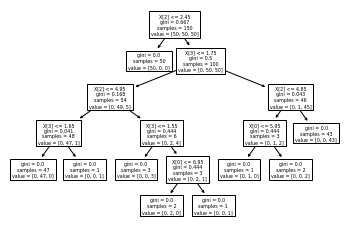

In [11]:
plot_tree(obj)

In [22]:
viz = dtreeviz.model(obj, 
               x,
               y,
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"])

In [16]:
import dtreeviz

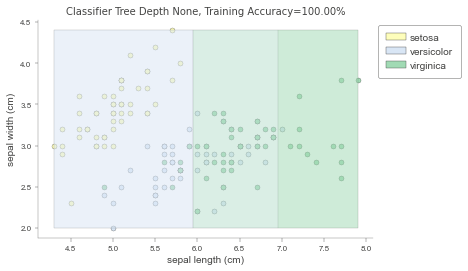

In [27]:
viz.ctree_feature_space()

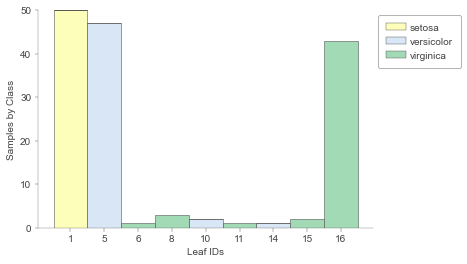

In [33]:
viz.ctree_leaf_distributions()

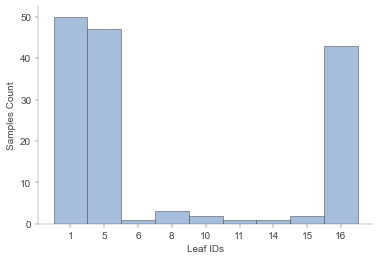

In [35]:
viz.leaf_sizes()

### Regression

In [52]:
from dtreeviz import decision_boundaries

In [53]:
decision_boundaries(obj, x, y, ax=axes[0],
       feature_names=["setosa", "versicolor", "virginica"])

NameError: name 'axes' is not defined